In [89]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Loading dataset

In [90]:
breast_cancer=sklearn.datasets.load_breast_cancer()
x=breast_cancer.data
y=breast_cancer.target

In [91]:
print(x.shape,y.shape)

(569, 30) (569,)


# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)
print(y.shape,y_test.shape,y_train.shape)

(569,) (57,) (512,)


In [93]:
def model(w,b,x):
    return 1 if (np.dot(w,x)>=b) else 0
def predict(w,b,X):
    y=[]
    for x in X:
        result=model(w,b,x)
        y.append(result)
    return np.array(y)
def fit(X,Y,epochs=1,lr=1):
    w=np.ones(X.shape[1])
    b=0
    
    accuracy={}
    max_accuracy=0
    
    wt_matrix=[]
    
    for i in range(epochs):
        for x,y in zip(X,Y):
            y_pred=model(w,b,x)
            if y==1 and y_pred==0:
                w=w+lr*x
                b=b-lr*1
            elif y==0 and y_pred==1:
                w=w-lr*x
                b=b+lr*1
        wt_matrix.append(w)
        
        accuracy[i]=accuracy_score(predict(w,b,X),Y)
        if accuracy[i]>max_accuracy:
            max_accuracy=accuracy[i]
            chkptw=w
            chkptb=b
        w=chkptw
        b=chkptb
        
    print(max_accuracy)
        
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()
        
    return np.array(wt_matrix),w,b

0.796875


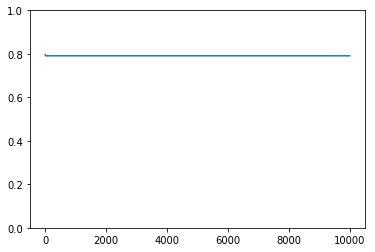

0.8596491228070176


In [94]:
wt_matrix,w,b=fit(x_train,y_train,10000,0.5)
y_pred_test=predict(w,b,x_test)
print(accuracy_score(y_pred_test,y_test))